# COVID Hubei Data

The [original article](https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30119-5/fulltext) references this [file](https://docs.google.com/spreadsheets/d/1itaohdPiAeniCXNlntNztZ_oRvjh0HsGuJXUJWET008/edit#gid=0) as having `patient-level` data. To our knowledge, there is no other dataset available online that has `patient-level` data. The original file is stored in an Excel file and there are two data sheets; one for patients inside of `Hubei` and one for those that are outside. Let's see what we have.

## Load Data

We have 2 data sheets, let's merge them into one. Does it really matter if the patients are in or outside of Hubei to the world at large? 

In [1]:
import pandas as pd

inside = pd.read_csv('./covid/data/00/COVID19_2020_open_line_list - Hubei.csv', low_memory=False)
outside = pd.read_csv('./covid/data/00/COVID19_2020_open_line_list - outside_Hubei.csv', low_memory=False)

outside = outside.drop(['data_moderator_initials'], axis=1)

data = pd.concat([inside, outside])

In [2]:
data.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id'],
      dtype='object')

## Age

The `age` field shows that age data is not kept consistently. In some cases, age is a whole number, in some cases, it is a float, yet, in many cases, age is a range. 

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')

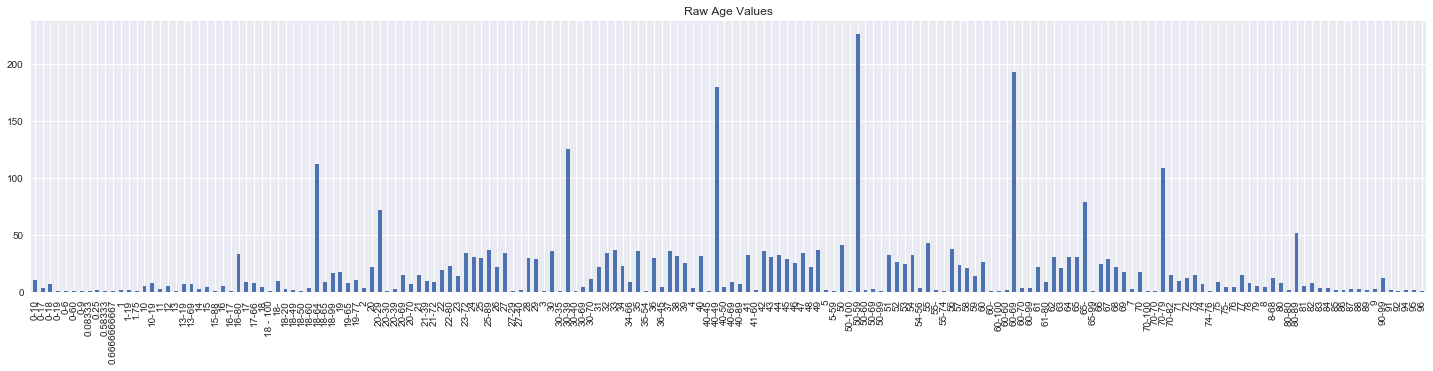

In [4]:
fig, ax = plt.subplots(figsize=(25, 5))
_ = data.age.value_counts().sort_index().plot(kind='bar', ax=ax, title='Raw Age Values')

Let's just look at the unique `age` values.

In [5]:
for i in data.age.value_counts().sort_index().index:
    print(f"'{i}'", end=',')

'0-10','0-17','0-18','0-19','0-6','0-60','0-9','0.08333','0.25','0.58333','0.6666666667','1','1-19','1.75','10','10-19','11','12','13','13-19','13-69','14','15','15-88','16','16-17','16-80','17','17-66','18','18 - 100','18-','18-20','18-49','18-50','18-60','18-64','18-65','18-99','19','19-65','19-77','2','20','20-29','20-30','20-39','20-69','20-70','21','21-39','21-72','22','22-80','23','23-72','24','25','25-89','26','27','27-29','27-40','28','29','3','30','30-35','30-39','30-40','30-69','30-70','31','32','33','34','34-66','35','35-54','36','36-45','37','38','39','4','40','40-45','40-49','40-50','40-69','40-89','41','41-60','42','43','44','45','46','47','48','49','5','5-59','50','50-100','50-59','50-60','50-69','50-99','51','52','53','54','54-56','55','55-','55-74','56','57','58','59','60','60-','60-100','60-60','60-69','60-70','60-99','61','61-80','62','63','64','65','65-','65-99','66','67','68','69','7','70','70-100','70-70','70-79','70-82','71','72','73','74','74-76','75','75-','76'

This map is an attempt to map the raw age values into the following age ranges.

* [0, 19],
* [20, 29],
* [30, 39],
* [40, 49],
* [50, 59],
* [60, 69],
* [70, 79],
* [80, 89], and
* [90, 99].

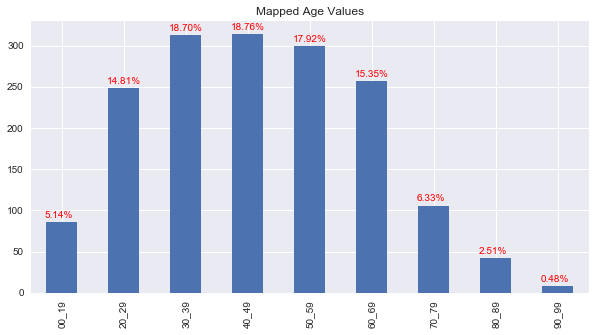

In [6]:
import numpy as np

age_map = {
    '00_19': set(['0-10','0-17','0-18','0-19','0-6','0-9','0.08333','0.25','0.58333','0.6666666667','1-19','1.75','10','10-19','13-19','16-17'] + [f"'{i}'" for i in range(20)]),
    '20_29': set(['20-29','27-29'] + [f"'{i}'" for i in range(20, 30)]),
    '30_39': set(['30-35','30-39'] + [f"'{i}'" for i in range(30, 40)]),
    '40_49': set(['40-45','40-49'] + [f"'{i}'" for i in range(40, 50)]),
    '50_59': set(['50-59','54-56', '55-'] + [f"'{i}'" for i in range(50, 60)]),
    '60_69': set(['60-','60-60','60-69','65-'] + [f"'{i}'" for i in range(60, 70)]),
    '70_79': set(['70-70','70-79','74-76','75-'] + [f"'{i}'" for i in range(70, 80)]),
    '80_89': set(['80-80','80-89'] + [f"'{i}'" for i in range(80, 90)]),
    '90_99': set(['90-99'] + [f"'{i}'" for i in range(90, 100)]),
}

get_age_group = lambda x: [k for k, v in age_map.items() if f"'{x}'" in v]

fig, ax = plt.subplots(figsize=(10, 5))

s = pd.Series(list(map(lambda arr: arr[0] if len(arr) > 0 else None, data.age.apply(lambda x: get_age_group(x))))).value_counts().sort_index()

_ = s.plot(kind='bar', ax=ax, title='Mapped Age Values')

totals = [i.get_height() for i in ax.patches]
total = sum(totals)

for i in ax.patches:
    x = i.get_x() - 0.03
    y = i.get_height() + 5.0
    p = i.get_height() / total * 100.0
    s = f'{p:.2f}%'
    ax.text(x, y, s, fontsize=10, color='red')

## Sex

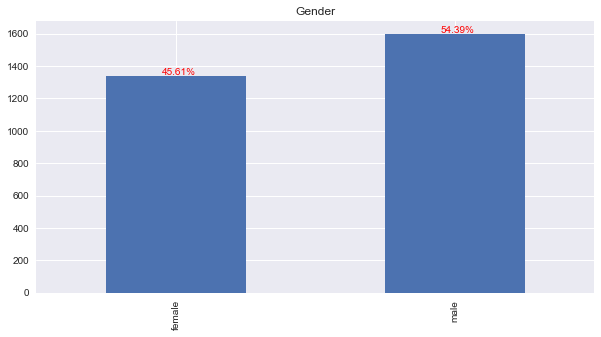

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))

_ = data.sex.value_counts().sort_index().plot(kind='bar', ax=ax, title='Gender')

totals = [i.get_height() for i in ax.patches]
total = sum(totals)

for i in ax.patches:
    x = i.get_x() + 0.2
    y = i.get_height() + 5.0
    p = i.get_height() / total * 100.0
    s = f'{p:.2f}%'
    ax.text(x, y, s, fontsize=10, color='red')

## Chronic Disease

Only very few patients had a `yes` or `no` answer reported to indicate if the patient had chronic diseases. May we assume that missing values indicate `no`? Not really. Of the patients that were recorded to have a `yes` or `no` to having at least one chronic disease, over `86%` reported yes.

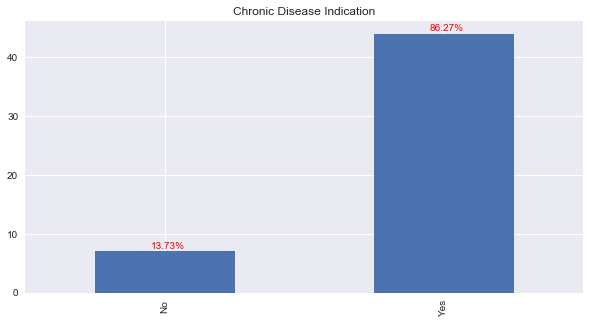

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

s = data.chronic_disease_binary.apply(lambda v: 'No' if v == 0.0 else 'Yes' if v == 1.0 else None)
_ = s.value_counts().sort_index().plot(kind='bar', ax=ax, title='Chronic Disease Indication')

totals = [i.get_height() for i in ax.patches]
total = sum(totals)

for i in ax.patches:
    x = i.get_x() + 0.2
    y = i.get_height() + 0.5
    p = i.get_height() / total * 100.0
    s = f'{p:.2f}%'
    ax.text(x, y, s, fontsize=10, color='red')

Here, we map the disease to 4 main categories.

* hypertension,
* diabetes,
* coronary heart dieases, and
* other.

Other were basically diseases that had only a count of 1 and were all lumped in together. 

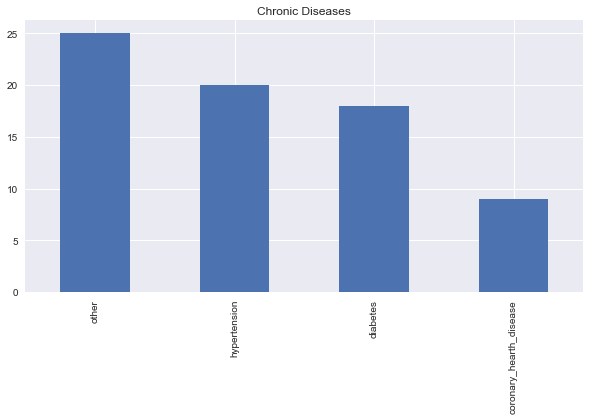

In [9]:
import itertools

def tokenize(s):
    if s is None or isinstance(s, float) or len(s) < 1 or pd.isna(s):
        return None
    try:
        delim = ';' if ';' in s else ','
        return [t.strip().lower() for t in s.split(delim) if len(t.strip()) > 0]
    except:
        return s
    
def map_to_disease(d):
    if 'hypertension' in d:
        return 'hypertension'
    elif 'diabetes' in d:
        return 'diabetes'
    elif 'coronary' in d or 'pulmonary' in d:
        return 'coronary_hearth_disease'
    else:
        return 'other'

diseases = list(itertools.chain(*[item for item in data.chronic_disease.apply(lambda s: tokenize(s)) if item is not None]))

key = lambda s: map_to_disease(s)
diseases = sorted([(k, len(list(g))) for k, g in itertools.groupby(sorted(diseases, key=key), key)], key=lambda tup: tup[1], reverse=True)

s = pd.Series([tup[1] for tup in diseases], [tup[0] for tup in diseases])

fig, ax = plt.subplots(figsize=(10, 5))
_ = s.plot(kind='bar', ax=ax, title='Chronic Diseases')

## Symptoms

Symptoms are also grouped. Note that the grouping approach is far from being medically correct; this exercise is merely to aggregate what could be similar based on spelling, meaning and similarity. However, the groupings do represent some of the major symptoms associated with COVID-19 (reference needed). The major categories of symptoms reportedly associated with COVID are

* fever,
* coughing, and
* joint/muscle pain.

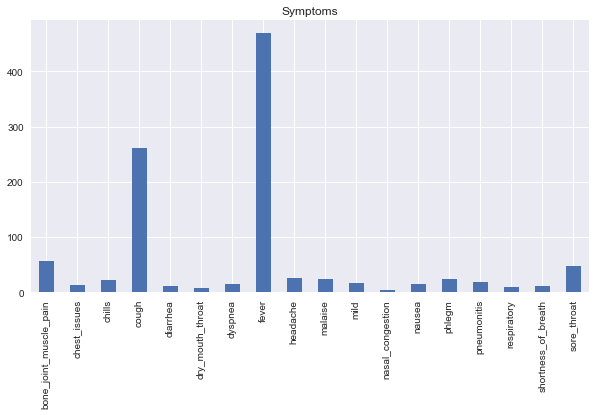

In [10]:
def map_to_symptom(s):
    if 'fever' in s:
        return 'fever'
    elif 'cough' in s:
        return 'cough'
    elif 'sore throat' in s:
        return 'sore_throat'
    elif 'headache' in s:
        return 'headache'
    elif 'chills' in s:
        return 'chills'
    elif 'malaise' in s:
        return 'malaise'
    elif 'pneumonitis' in s:
        return 'pneumonitis'
    elif 'mild' in s:
        return 'mild'
    elif 'dyspnea' in s:
        return 'dyspnea'
    elif 'shortness of breath' in s:
        return 'shortness_of_breath'
    elif 'bone pain' in s or 'joint pain' in s or 'muscular soreness' in s or 'myalgia' in s or 'muscle' in s or 'body aches' in s or 'pain' in s:
        return 'bone_joint_muscle_pain'
    elif 'diarrhea' in s or 'diarrheoa' in s or 'diarrhoea' in s:
        return 'diarrhea'
    elif 'dry cough' in s or 'coughing' in s:
        return 'dry_cough'
    elif 'phlegm' in s or 'sputum' in s or 'expectoration' in s:
        return 'phlegm'
    elif 'chest' in s:
        return 'chest_issues'
    elif 'nausea' in s or 'vomiting' in s:
        return 'nausea'
    elif 'nasal congestion' in s:
        return 'nasal_congestion'
    elif 'dry' in s:
        return 'dry_mouth_throat'
    elif 'respiratory' in s:
        return 'respiratory'
    else:
        return 'other'
    
symptoms = list(itertools.chain(*[item for item in data.symptoms.apply(lambda s: tokenize(s)) if item is not None]))

key = lambda s: map_to_symptom(s)
symptoms = sorted([(k, len(list(g))) for k, g in itertools.groupby(sorted(symptoms, key=key), key) if k != 'other'], key=lambda tup: tup[1], reverse=True)

s = pd.Series([tup[1] for tup in symptoms], [tup[0] for tup in symptoms]).sort_index()

fig, ax = plt.subplots(figsize=(10, 5))
_ = s.plot(kind='bar', ax=ax, title='Symptoms')

## Outcomes

Surprisingly, less than 20 cases were reported to result in an outcome of `death`, while the vast majority of patients ended up being `discharged`, followed by being listed in `stable` condition.

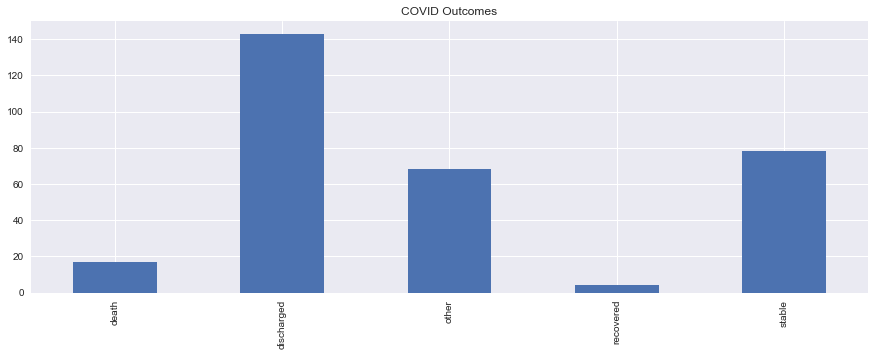

In [11]:
def map_outcome(v):
    if v is None:
        return None
    if isinstance(v, float):
        return None
    
    o = v.lower()
    
    if 'discharge' in o:
        return 'discharged'
    elif 'stable' in o:
        return 'stable'
    elif 'death' in o or 'dead' in o:
        return 'death'
    elif 'recov' in o:
        return 'recovered'
    else:
        return 'other'
    
s = data.outcome.apply(lambda v: map_outcome(v)).value_counts().sort_index()

fig, ax = plt.subplots(figsize=(15, 5))
_ = s.plot(kind='bar', ax=ax, title='COVID Outcomes')

## Modeling

Let's try to model how age, gender, chronic diseases and symptoms influence prognosis of death. Filtering through the data, we lose ever more records; from over `47,000` to just a little over `200`. Also, we transform the data to be nearly all binary.

In [12]:
data[['age', 'sex', 'chronic_disease', 'symptoms', 'outcome']].shape

(47201, 5)

In [13]:
data[['age', 'sex', 'chronic_disease', 'symptoms', 'outcome']].dropna(how='all').shape

(3605, 5)

In [14]:
def get_single_age_group(x):
    groups = get_age_group(x)
    return None if len(groups) < 1 else groups[0]

d = data[['age', 'sex', 'chronic_disease', 'symptoms', 'outcome']].dropna(how='all').copy(deep=True)
d.age = d.age.apply(lambda x: get_single_age_group(x))
d = d[pd.notna(d.age)]
d.age = d.age.apply(lambda a: int(a.split('_')[0]))
print(d.shape)

d.sex = d.sex.apply(lambda v: 1 if v == 'male' else 0)

d.outcome = d.outcome.apply(lambda v: map_outcome(v))
d = d[pd.notna(d.outcome)]
d.outcome = d.outcome.apply(lambda v: 1 if v == 'death' else 0)
print(d.shape)

d.chronic_disease = d.chronic_disease.apply(lambda s: tokenize(s))
d.chronic_disease = d.chronic_disease.apply(lambda tokens: [map_to_disease(d) for d in tokens] if tokens is not None else None)

d.symptoms = d.symptoms.apply(lambda s: tokenize(s))
d.symptoms = d.symptoms.apply(lambda tokens: [map_to_symptom(s) for s in tokens] if tokens is not None else None)

d['hypertension'] = d.chronic_disease.apply(lambda arr: 0 if arr is None else 1 if 'hypertension' in arr else 0)
d['chd'] = d.chronic_disease.apply(lambda arr: 0 if arr is None else 1 if 'coronary_hearth_disease' in arr else 0)
d['diabetes'] = d.chronic_disease.apply(lambda arr: 0 if arr is None else 1 if 'diabetes' in arr else 0)

for s in ['fever', 'cough', 'sore_throat', 'headache', 'dyspnea', 'shortness_of_breath', 'diarrhea', 'bone_joint_muscle_pain', 'chills', 'phlegm', 'chest_issues', 'respiratory']:
    d[s] = d.symptoms.apply(lambda arr: 0 if arr is None else 1 if s in arr else 0)

d = d.drop(['chronic_disease', 'symptoms'], axis=1)
print(d.shape)

d

(1674, 5)
(205, 5)
(205, 18)


,age,sex,outcome,hypertension,chd,diabetes,fever,cough,sore_throat,headache,dyspnea,shortness_of_breath,diarrhea,bone_joint_muscle_pain,chills,phlegm,chest_issues,respiratory
0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
3,60,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
4,40,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0
5,80,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21840,90,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23099,30,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
23100,30,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
23102,60,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
d.describe()

,age,sex,outcome,hypertension,chd,diabetes,fever,cough,sore_throat,headache,dyspnea,shortness_of_breath,diarrhea,bone_joint_muscle_pain,chills,phlegm,chest_issues,respiratory
count,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,44.292683,0.57561,0.048780,0.073171,0.034146,0.058537,0.268293,0.170732,0.024390,0.009756,0.019512,0.009756,0.009756,0.029268,0.024390,0.019512,0.029268,0.004878
std,20.889818,0.49546,0.215936,0.261054,0.182050,0.235330,0.444155,0.377195,0.154635,0.098531,0.138655,0.098531,0.098531,0.168970,0.154635,0.138655,0.168970,0.069843
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Note the class imbalance, where the positive class is about `5%`!

In [16]:
d.outcome.value_counts()

0    195
1     10
Name: outcome, dtype: int64

### Bivariate Correlation Visualization

Here, we use `Jaccard` similarity and the `point-biserial` measures to evaluate the strength of associations between binary-to-binary and continuous-to-binary pairs of variables. Diabetes and fever have comparatively high correlations to hypertension and cough, respectively. Age also has scattered, relatively high correlations to other variables.

In [17]:
def get_jaccard_sim(df, c1, c2):
    s_11 = len(df[(df[c1] == 1) & (df[c2] == 1)])
    s_01 = len(df[(df[c1] == 0) & (df[c2] == 1)])
    s_10 = len(df[(df[c1] == 1) & (df[c2] == 0)])
    
    return s_11 / (s_11 + s_01 + s_10)

def get_point_biserial(df, c, d):
    n_0 = 0
    n_1 = 0
    c_0 = []
    c_1 = []
    
    for _, r in df.iterrows():
        d_v = r[d]
        c_v = r[c]
        
        if pd.isna(d_v) or pd.isna(c_v):
            continue
        
        if d_v == 0:
            n_0 += 1
            c_0.append(c_v)
        elif d_v == 1:
            n_1 += 1
            c_1.append(c_v)
    
    n = n_0 + n_1
    a = c_0 + c_1
    
    c_0 = pd.Series(c_0)
    c_1 = pd.Series(c_1)
    a = pd.Series(a)
    
    m_0 = c_0.mean()
    m_1 = c_1.mean()
    s = a.std()
    r = (m_1 - m_0) / s if s != 0.0 else 0.0
    r = r * np.sqrt((n_1 * n_0) / (n * n))
    
    return r
    
    
cols = d.columns
n = len(cols)
corr = np.zeros((n, n))

for i, c1 in enumerate(cols):
    for j, c2 in enumerate(cols):
        if j < i:
            continue
        if c1 == 'age':
            r = get_point_biserial(d, c1, c2)
        else:
            r = get_jaccard_sim(d, c1, c2)
        corr[i][j] = corr[j][i] = r

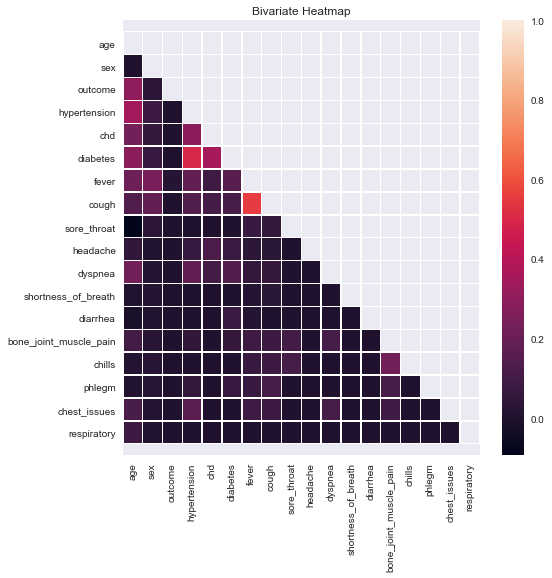

In [18]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

_ = sns.heatmap(pd.DataFrame(corr, columns=cols, index=cols), ax=ax, mask=mask, linewidths=.5)

bottom, top = ax.get_ylim()
_ = ax.set_ylim(bottom + 0.5, top - 0.5)
_ = ax.set_title('Bivariate Heatmap')

### Logistic Regression

A simple logistic regression model using area under the curve (AUC) for ROC (5%) and PR (3%) shows very unpromising results. Furthermore, the sensitivity (recall on the positive class) is 10% and the specificity (recall on the negative class) is 99%; the classifier is specific, but not sensitive. 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, accuracy_score
from imblearn.metrics import sensitivity_score, specificity_score

X =  d.drop('outcome', axis=1)
y = d.outcome

print(X.shape, y.shape)

(205, 17) (205,)


In [20]:
model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=37)
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

acc = accuracy_score(y, y_pred)
sen = sensitivity_score(y, y_pred)
spe = specificity_score(y, y_pred)

roc = roc_auc_score(y, y_prob[:,0])
pr = average_precision_score(y, y_prob[:,0])
print(f'acc={acc:.5f}, sen={sen:.5f}, spe={spe:.5f}, roc={roc:.5f}, pr={pr:.5f}')
print(classification_report(y, y_pred))

acc=0.94634, sen=0.10000, spe=0.98974, roc=0.05410, pr=0.02901
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       195
           1       0.33      0.10      0.15        10

    accuracy                           0.95       205
   macro avg       0.64      0.54      0.56       205
weighted avg       0.93      0.95      0.93       205



The only variable with a `harmful` effect on prognosis is `age`. 

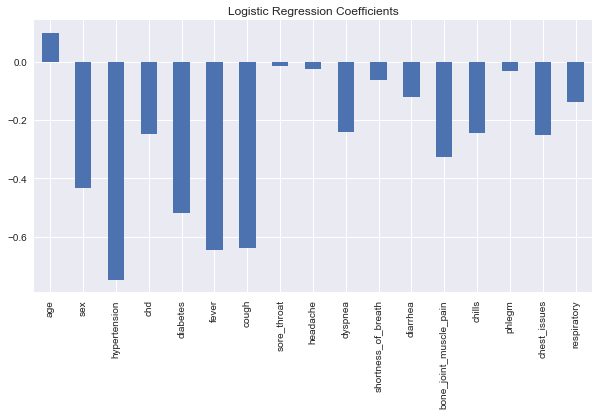

In [21]:
s = pd.Series(model.coef_[0], X.columns)

fig, ax = plt.subplots(figsize=(10, 5))
_ = s.plot(kind='bar', ax=ax, title='Logistic Regression Coefficients')

Since the AUC for ROC and PR were so bad, we [inverted](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#ROC_space) the decision of the classifier and obtained better results.

In [22]:
roc = roc_auc_score(y, y_prob[:,1])
pr = average_precision_score(y, y_prob[:,1])
print(f'roc={roc:.5f}, pr={pr:.5f}')

roc=0.94590, pr=0.37349


### Oversampling

Let's try some oversampling techniques.

* Random oversampling
* SMOTE
* ADASYN

In [23]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X =  d.drop('outcome', axis=1)
y = d.outcome

print(X.shape, y.shape)

ros = RandomOverSampler(random_state=37)
X, y = ros.fit_resample(X, y)

print(sorted(Counter(y).items()))

(205, 17) (205,)
[(0, 195), (1, 195)]


In [24]:
model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=37)
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

acc = accuracy_score(y, y_pred)
sen = sensitivity_score(y, y_pred)
spe = specificity_score(y, y_pred)

roc = roc_auc_score(y, y_prob[:,0])
pr = average_precision_score(y, y_prob[:,0])
print(f'acc={acc:.5f}, sen={sen:.5f}, spe={spe:.5f}, roc={roc:.5f}, pr={pr:.5f}')
print(classification_report(y, y_pred))

acc=0.92564, sen=1.00000, spe=0.85128, roc=0.05106, pr=0.34965
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       195
           1       0.87      1.00      0.93       195

    accuracy                           0.93       390
   macro avg       0.94      0.93      0.93       390
weighted avg       0.94      0.93      0.93       390



In [25]:
roc = roc_auc_score(y, y_prob[:,1])
pr = average_precision_score(y, y_prob[:,1])
print(f'roc={roc:.5f}, pr={pr:.5f}')

roc=0.94894, pr=0.91483


In [26]:
from imblearn.over_sampling import SMOTE, ADASYN

X =  d.drop('outcome', axis=1)
y = d.outcome

print(X.shape, y.shape)

X, y = SMOTE().fit_resample(X, y)

print(sorted(Counter(y).items()))

model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=37)
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

acc = accuracy_score(y, y_pred)
sen = sensitivity_score(y, y_pred)
spe = specificity_score(y, y_pred)

roc = roc_auc_score(y, y_prob[:,0])
pr = average_precision_score(y, y_prob[:,0])
print(f'acc={acc:.5f}, sen={sen:.5f}, spe={spe:.5f}, roc={roc:.5f}, pr={pr:.5f}')
print(classification_report(y, y_pred))

(205, 17) (205,)
[(0, 195), (1, 195)]
acc=0.93590, sen=0.97436, spe=0.89744, roc=0.03144, pr=0.34324
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       195
           1       0.90      0.97      0.94       195

    accuracy                           0.94       390
   macro avg       0.94      0.94      0.94       390
weighted avg       0.94      0.94      0.94       390



In [27]:
X =  d.drop('outcome', axis=1)
y = d.outcome

print(X.shape, y.shape)

X, y = ADASYN().fit_resample(X, y)

print(sorted(Counter(y).items()))

model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=37)
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

acc = accuracy_score(y, y_pred)
sen = sensitivity_score(y, y_pred)
spe = specificity_score(y, y_pred)

roc = roc_auc_score(y, y_prob[:,0])
pr = average_precision_score(y, y_prob[:,0])
print(f'acc={acc:.5f}, sen={sen:.5f}, spe={spe:.5f}, roc={roc:.5f}, pr={pr:.5f}')
print(classification_report(y, y_pred))

(205, 17) (205,)
[(0, 195), (1, 196)]
acc=0.93350, sen=0.96939, spe=0.89744, roc=0.03422, pr=0.33895
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       195
           1       0.90      0.97      0.94       196

    accuracy                           0.93       391
   macro avg       0.94      0.93      0.93       391
weighted avg       0.94      0.93      0.93       391



### Undersampling

We are curious to see what undersampling may do.

In [28]:
from imblearn.under_sampling import ClusterCentroids

X =  d.drop('outcome', axis=1)
y = d.outcome

print(X.shape, y.shape)

X, y = ClusterCentroids(random_state=37).fit_resample(X, y)

print(sorted(Counter(y).items()))

model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=37)
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

acc = accuracy_score(y, y_pred)
sen = sensitivity_score(y, y_pred)
spe = specificity_score(y, y_pred)

roc = roc_auc_score(y, y_prob[:,0])
pr = average_precision_score(y, y_prob[:,0])
print(f'acc={acc:.5f}, sen={sen:.5f}, spe={spe:.5f}, roc={roc:.5f}, pr={pr:.5f}')
print(classification_report(y, y_pred))

(205, 17) (205,)
[(0, 10), (1, 10)]
acc=0.85000, sen=0.90000, spe=0.80000, roc=0.12000, pr=0.36349
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



### K-Fold Cross Validation

Let's do 5-fold cross validation and see what the average results are for the following performance metrics.

In [29]:
from sklearn.model_selection import StratifiedKFold

X =  d.drop('outcome', axis=1).to_numpy()
y = d.outcome.to_numpy()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)

results = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train, y_train = SMOTE().fit_resample(X_train, y_train)

    model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=37)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    sen = sensitivity_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)

    roc = roc_auc_score(y_test, y_prob[:,0])
    pr = average_precision_score(y_test, y_prob[:,0])
    
    iroc = roc_auc_score(y_test, y_prob[:,1])
    ipr = average_precision_score(y_test, y_prob[:,1])
    
    metrics = [acc, sen, spe, roc, pr, iroc, ipr]
    print(','.join([f'{m:.5f}' for m in metrics]))
    results.append(metrics)

0.95122,0.50000,0.97436,0.06410,0.03828,0.93590,0.39286
0.95122,0.50000,0.97436,0.06410,0.03828,0.93590,0.39286
0.78049,1.00000,0.76923,0.12179,0.04035,0.87821,0.22500
0.82927,1.00000,0.82051,0.02564,0.03721,0.97436,0.50000
0.87805,1.00000,0.87179,0.03205,0.03782,0.96795,0.50000


In [30]:
pd.DataFrame(results, columns=['acc', 'sen', 'spe', 'roc', 'pr', 'iroc', 'ipr']).mean()

acc     0.878049
sen     0.800000
spe     0.882051
roc     0.061538
pr      0.038387
iroc    0.938462
ipr     0.402143
dtype: float64

## Survival Analysis

Now we will estimate survival from the recorded date of onset of symptoms using Kaplan-Meier estimation and Cox Proportional Hazards (CPH).

### Kaplan-Meier Survival Estimation

In [31]:
from datetime import datetime

d = data[['date_onset_symptoms', 'date_death_or_discharge', 'outcome']].copy(deep=True)
d.shape

d = d.dropna(axis=0, how='all')
d.shape

d = d[pd.notna(d.date_onset_symptoms)]
print(d.shape)

d = d[pd.notna(d.date_death_or_discharge)]
print(d.shape)

d.outcome = d.outcome.apply(lambda v: map_outcome(v))
d = d[pd.notna(d.outcome)]
d['E'] = d.outcome.apply(lambda v: 1 if v == 'death' else None if v is None else 0)
print(d.shape)

d['start'] = d.date_onset_symptoms.apply(lambda s: datetime.strptime(s, '%d.%m.%Y'))
d['stop'] = d.date_death_or_discharge.apply(lambda s: datetime.strptime(s, '%d.%m.%Y'))
d['T'] = d.apply(lambda r: int((r.stop - r.start).days), axis=1)
d = d[d['T'] >= 0]
print(d.shape)

d = d.drop(['date_onset_symptoms', 'date_death_or_discharge', 'outcome', 'start', 'stop'], axis=1)
print(d.shape)

(993, 3)
(111, 3)
(110, 4)
(109, 7)
(109, 2)


In [32]:
from lifelines import KaplanMeierFitter

T = d['T']
E = d.E

kmf = KaplanMeierFitter()
_ = kmf.fit(T, event_observed=E)

The median survival time is the time at which 50% of the patients suffer from the outcome. Here, the median survival time is `infinite`, meaning, patients have a good chance of surviving the disease.

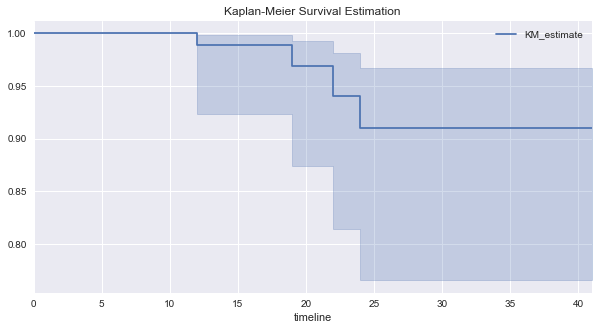

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

_ = kmf.plot(ax=ax, title='Kaplan-Meier Survival Estimation')

### Cox Proportional Hazard

Now we can use survival regression with CPH to see how the covariates influence survival.

In [34]:
d = data[['age', 'sex', 'chronic_disease', 'symptoms', 'date_onset_symptoms', 'date_death_or_discharge', 'outcome']].dropna(how='all').copy(deep=True)
print(d.shape)

d.age = d.age.apply(lambda x: get_single_age_group(x))
d = d[pd.notna(d.age)]
d.age = d.age.apply(lambda a: int(a.split('_')[0]))
print(d.shape)

d.sex = d.sex.apply(lambda v: 1 if v == 'male' else 0)

d.chronic_disease = d.chronic_disease.apply(lambda s: tokenize(s))
d.chronic_disease = d.chronic_disease.apply(lambda tokens: [map_to_disease(d) for d in tokens] if tokens is not None else None)

d.symptoms = d.symptoms.apply(lambda s: tokenize(s))
d.symptoms = d.symptoms.apply(lambda tokens: [map_to_symptom(s) for s in tokens] if tokens is not None else None)

d['hypertension'] = d.chronic_disease.apply(lambda arr: 0 if arr is None else 1 if 'hypertension' in arr else 0)
d['chd'] = d.chronic_disease.apply(lambda arr: 0 if arr is None else 1 if 'coronary_hearth_disease' in arr else 0)
d['diabetes'] = d.chronic_disease.apply(lambda arr: 0 if arr is None else 1 if 'diabetes' in arr else 0)

for s in ['fever', 'cough', 'sore_throat', 'headache', 'dyspnea', 'shortness_of_breath', 'diarrhea', 'bone_joint_muscle_pain', 'chills', 'phlegm', 'chest_issues', 'respiratory']:
    d[s] = d.symptoms.apply(lambda arr: 0 if arr is None else 1 if s in arr else 0)

d = d.drop(['chronic_disease', 'symptoms'], axis=1)
print(d.shape)

d = d[pd.notna(d.date_onset_symptoms)]
print(d.shape)

d = d[pd.notna(d.date_death_or_discharge)]
print(d.shape)

d.outcome = d.outcome.apply(lambda v: map_outcome(v))
d = d[pd.notna(d.outcome)]
d['E'] = d.outcome.apply(lambda v: 1 if v == 'death' else None if v is None else 0)
print(d.shape)

d['start'] = d.date_onset_symptoms.apply(lambda s: datetime.strptime(s, '%d.%m.%Y'))
d['stop'] = d.date_death_or_discharge.apply(lambda s: datetime.strptime(s, '%d.%m.%Y'))
d['T'] = d.apply(lambda r: int((r.stop - r.start).days), axis=1)
d = d[d['T'] >= 0]
print(d.shape)

d = d.drop(['date_onset_symptoms', 'date_death_or_discharge', 'outcome', 'start', 'stop'], axis=1)
print(d.shape)

(3610, 7)
(1674, 7)
(1674, 20)
(705, 20)
(103, 20)
(102, 21)
(101, 24)
(101, 19)


In [35]:
from lifelines import CoxPHFitter
import warnings

warnings.filterwarnings('ignore')

cph = CoxPHFitter()
cph.fit(d, duration_col='T', event_col='E')

cph.print_summary()